In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

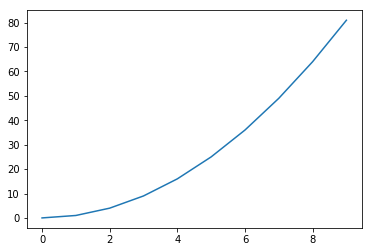

In [41]:
x = np.arange(10)
y = x**2
plt.plot(x, y);

In [19]:
%%timeit
x = range(10000)
a = max(x)

473 µs ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
import pandas as pd

In [21]:
step_data = [3620, 7891, 9761,
            3907, 4338, 5373]

step_counts = pd.Series(step_data,
                       name='steps')

print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [22]:
step_counts.index = pd.date_range('20150329',
                                 periods=6)
print(step_counts)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [23]:
#just like a dictionary
print(step_counts['2015-04-01'])

3907


In [24]:
#or by indexing position-like an array
print(step_counts[3])

3907


In [25]:
#select all of april
print(step_counts['2015-04'])

2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [26]:
#view all data type
print(step_counts.dtypes)

int64


In [27]:
#convert to float
step_counts = step_counts.astype(np.float)

In [28]:
#view data type
print(step_counts.dtypes)

float64


In [29]:
#create invalid data
step_counts[1:3] = np.NaN

In [30]:
#Now fill it in with zeros
step_counts = step_counts.fillna(0.)
#equivalently,
#step_counts.fillna(0., inplace=True)

print(step_counts[1:3])

2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


In [31]:
#cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3,
               10.9, 0, None]

In [32]:
#Create a tuple of data
joined_data = list(zip(step_data,
                      cycling_data))

In [33]:
#The dataframe
activity_df = pd.DataFrame(joined_data)
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [34]:
#add column names to dataframe
activity_df = pd.DataFrame (joined_data,
                           index=pd.date_range('20150329',
                                              periods=6),
                           columns=['Walking', 'Cycling'])
print(activity_df)

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


In [35]:
#select row of data by index name
print(activity_df.loc['2015-04-01'])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [36]:
#select row of data by integer position
print(activity_df.iloc[-3])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [37]:
#name of column
print(activity_df['Walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [38]:
#object oriented approach
print(activity_df.Walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [39]:
#first column
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [42]:
#The location of the data file
filepath = 'data/Iris_Data.csv'

#import the data
data = pd.read_csv(filepath)

#Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [44]:
#create new column that is a product of both measurements 
data['sepal_area'] = data.sepal_length * data.sepal_width

#print a few rows and columns
print(data.iloc[:5, -3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


In [47]:
#The lambda function applies what follows it to each row of data
data['abbrev'] = (data
                 .species
                 .apply(lambda x:
                       x.replace('Iris-','')))

#Note that there are other ways to accomplish the above
print(data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [49]:
#Concatenate the forst two and last two rows
small_data = pd.concat([data.iloc[:2],
                      data.iloc[-2:]])

print(small_data.iloc[:,-3:])
#see the 'join' methid for SQL style joining of dataframes

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


In [50]:
#use the size method with a DataFrame to get count For a Series, use the .value_counts method
group_sizes = (data
              .groupby('species')
              .size())

print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [51]:
#mean calculated on a DataFrame
print(data.mean())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64


In [53]:
#Median calculated on a Seires
print(data.petal_length.median())

4.35


In [54]:
#mode calculated on a series
print(data.petal_length.mode())

0    1.5
dtype: float64


In [56]:
#standard deviation, varialve, and SEM
print(data.petal_length.std(),
     data.petal_length.var(),
     data.petal_length.sem())

1.7644204199522617 3.1131794183445156 0.144064324021


In [58]:
#as well as quantities
print(data.quantile(0))

sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [60]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [62]:
#sample 5 rows withour replacement
sample = (data
         .sample (n=5,
                 replace=False,
                 random_state=42))

print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


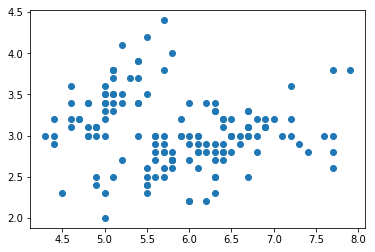

In [65]:
#Visual Libraries --> Matplotlib, Pandas(via Matplotlib), seaborn
import matplotlib.pyplot as plt

plt.plot(data.sepal_length,
        data.sepal_width,
        ls ='', marker='o')

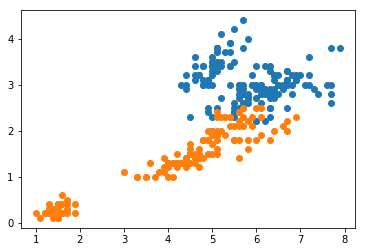

In [66]:
plt.plot(data.sepal_length,
        data.sepal_width,
        ls ='', marker='o',
        label='sepal')

plt.plot(data.petal_length,
        data.petal_width,
        ls ='', marker='o',
        label='petal')

(array([  4.,   1.,   6.,   5.,  16.,   9.,   5.,   6.,   7.,  14.,   7.,
          9.,   6.,  13.,   7.,   7.,   8.,   3.,   5.,   1.,   4.,   1.,
          1.,   4.,   1.]),
 array([ 4.3  ,  4.444,  4.588,  4.732,  4.876,  5.02 ,  5.164,  5.308,
         5.452,  5.596,  5.74 ,  5.884,  6.028,  6.172,  6.316,  6.46 ,
         6.604,  6.748,  6.892,  7.036,  7.18 ,  7.324,  7.468,  7.612,
         7.756,  7.9  ]),
 <a list of 25 Patch objects>)

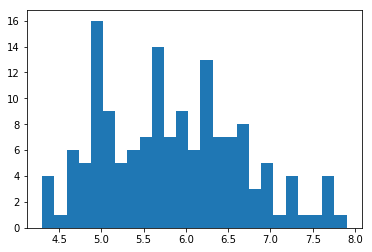

In [68]:
plt.hist(data.sepal_length, bins=25)

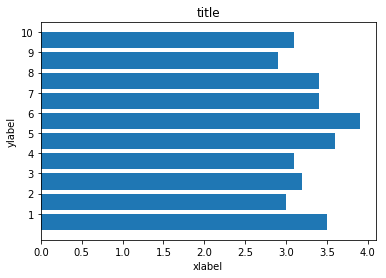

In [69]:
fig, ax = plt.subplots()

ax.barh(np.arange(10),
       data.sepal_width.iloc[:10])

#set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='title')

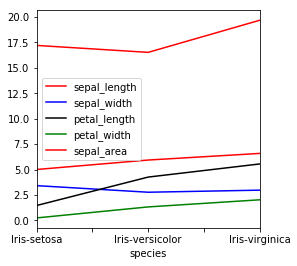

In [72]:
(data
.groupby('species')
.mean()
.plot(color=['red','blue',
            'black','green'],
     fontsize=10.0, figsize=(4,4)))

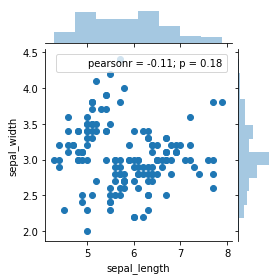

In [73]:
import seaborn as sns

sns.jointplot(x='sepal_length',
             y='sepal_width',
             data=data, size=4)

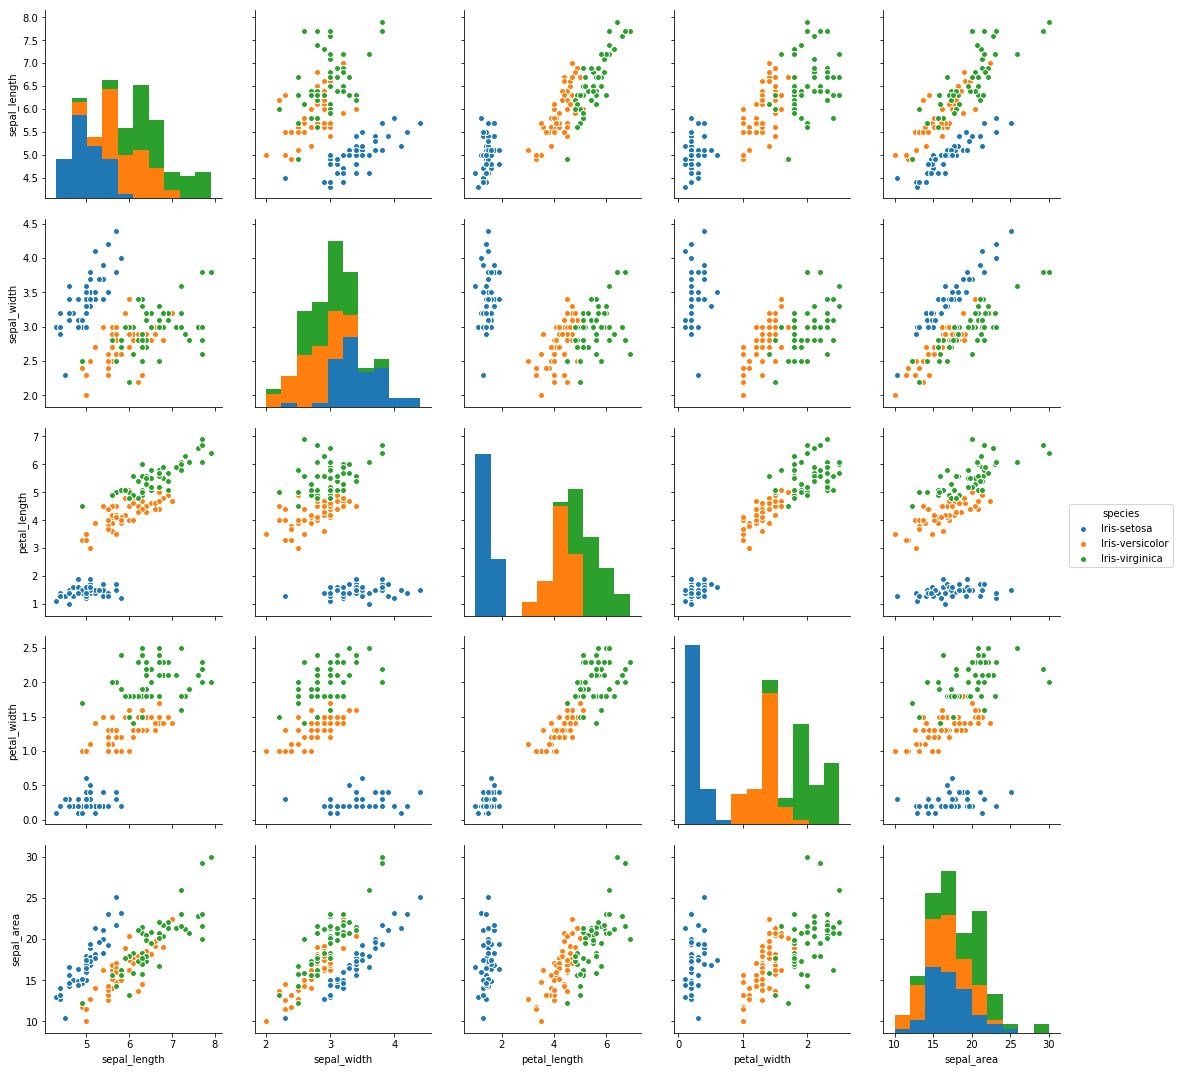

In [74]:
sns.pairplot(data, hue='species', size=3)